<a href="https://colab.research.google.com/github/SHAESTHA-KOWNAIN/STAT_ML_ASSIGNMENTS_2503/blob/main/STAT_ML_A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
data = pd.read_csv('/content/breast_cancer_survival.csv')
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,0,0,2,118,238,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,155,228,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,0,137,62,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,0,0,2,101,270,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,66,37,0


In [5]:

data.dtypes

,0
Age,int64
Gender,int64
Protein1,float64
Protein2,float64
Protein3,float64
Protein4,float64
Tumour_Stage,int64
Histology,int64
ER status,int64
PR status,int64


In [6]:
data.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [7]:
X=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit','ER status','PR status'],axis=1)
y=data['Patient_Status']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

svm=SVC()
knn=KNeighborsClassifier()
lr=LogisticRegression()

In [10]:
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
log_reg_accuracy = accuracy_score(y_test, lr.predict(X_test))

In [12]:
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", log_reg_accuracy)

SVM Accuracy: 0.7761194029850746
KNN Accuracy: 0.7313432835820896
Logistic Regression Accuracy: 0.7761194029850746


In [13]:

def bootstrap_accuracy(model, X, y,Xt,yt, n_iterations=100):
    bootstrapped_accuracies = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y)
        model.fit(X_resampled, y_resampled)
        accuracy = accuracy_score(yt, model.predict(Xt))
        bootstrapped_accuracies.append(accuracy)
    return bootstrapped_accuracies

In [14]:

n_iterations = 100
svm_accuracies = bootstrap_accuracy(svm, X_train, y_train,X_test,y_test, n_iterations)
knn_accuracies = bootstrap_accuracy(knn, X_train, y_train,X_test,y_test, n_iterations)
log_reg_accuracies = bootstrap_accuracy(lr, X_train, y_train,X_test,y_test, n_iterations)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

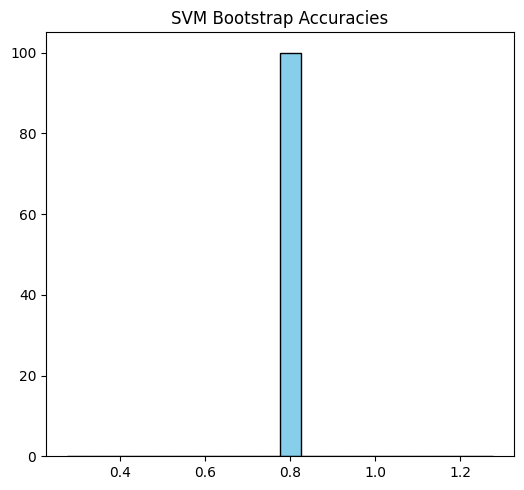

In [15]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(svm_accuracies, bins=20, color='skyblue', edgecolor='black')
plt.title("SVM Bootstrap Accuracies")
plt.tight_layout()
plt.show()

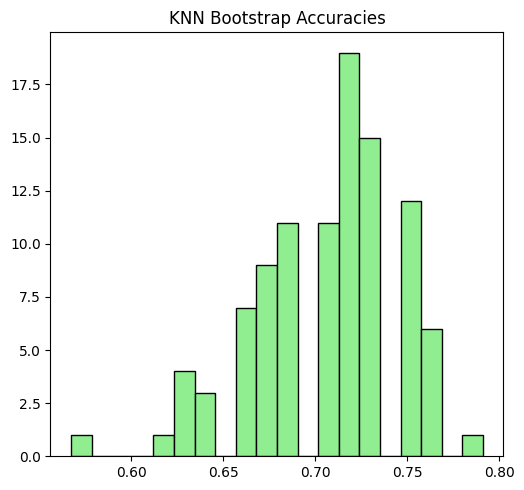

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.hist(knn_accuracies, bins=20, color='lightgreen', edgecolor='black')
plt.title("KNN Bootstrap Accuracies")
plt.tight_layout()
plt.show()

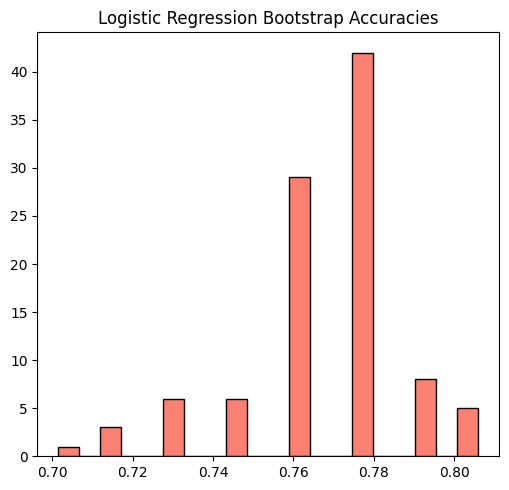

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.hist(log_reg_accuracies, bins=20, color='salmon', edgecolor='black')
plt.title("Logistic Regression Bootstrap Accuracies")
plt.tight_layout()
plt.show()